In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, LSTM, Flatten
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

nltk.download('punkt_tab')

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
data = pd.read_csv(r"NLP Dataset - Dataset-SA.csv", nrows=10000)

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing
data['processed_text'] = data['Summary'].apply(preprocess_text)

# Label Encoding
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Sentiment'])

# Split dataset
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['processed_text'], data['label'], test_size=0.2, random_state=42)

# Tokenization and Padding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
X_train = pad_sequences(tokenizer.texts_to_sequences(train_texts), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=max_len)


In [ ]:
# Define MLP Model
def create_mlp_model():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define LSTM Model
def create_lstm_model():
    model = Sequential([
        Embedding(max_words, 128, input_length=max_len),
        LSTM(100, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train MLP Model
mlp_model = create_mlp_model()
mlp_history = mlp_model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=5, batch_size=64)

# Train LSTM Model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=5, batch_size=64)

# Save models
mlp_model.save('mlp_text_classification.h5')
lstm_model.save('lstm_text_classification.h5')
print("Models saved successfully.")

# Plot Accuracy and Loss Matrices

# Function to preprocess new input text


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0483 - loss: -24086.0449 - val_accuracy: 0.0380 - val_loss: -696536.5625
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0444 - loss: -2502512.2500 - val_accuracy: 0.0380 - val_loss: -16513037.0000
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0451 - loss: -29834950.0000 - val_accuracy: 0.0380 - val_loss: -100195728.0000
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0406 - loss: -145573968.0000 - val_accuracy: 0.0380 - val_loss: -342418464.0000
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0408 - loss: -445854112.0000 - val_accuracy: 0.0380 - val_loss: -863580672.0000
Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 29s 213ms/step - accuracy: 0.0414 - loss: -6.1604 - val_accuracy: 0.0380 - val_loss: -16.4853
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - accuracy: 0.0416 - loss: -18.6347 - val_accuracy: 0.0380 - val_loss: -25.6845
Epoch 3/5
125/125 ━━━━━━━━━━

Models saved successfully.


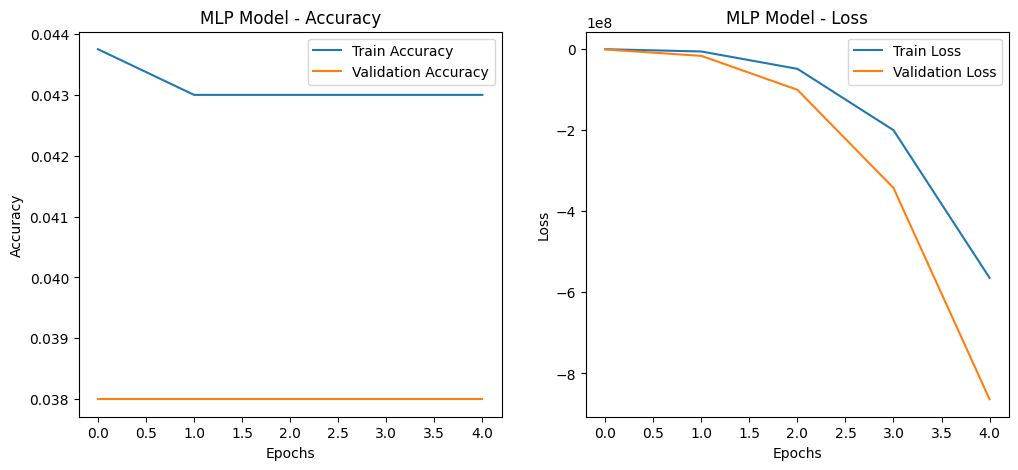

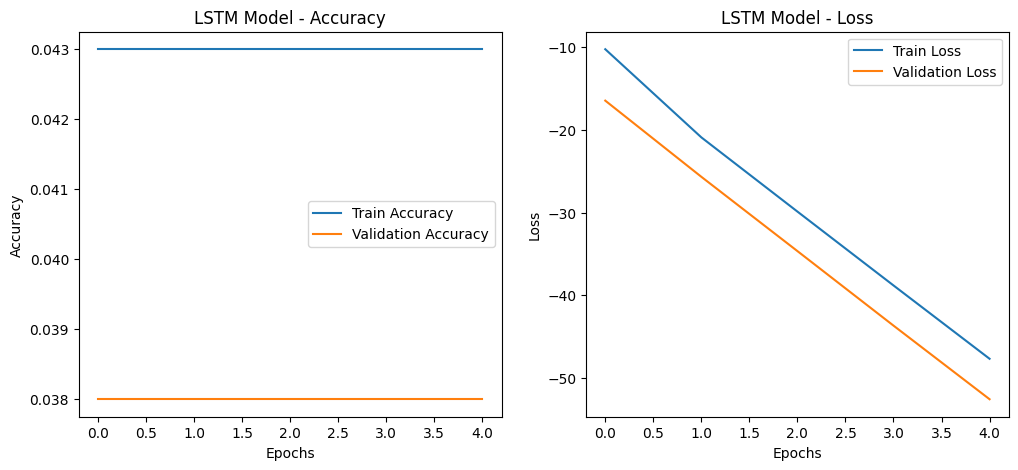

In [ ]:
def plot_training_results(history, title):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

# Plot results for both models
plot_training_results(mlp_history, "MLP Model")
plot_training_results(lstm_history, "LSTM Model")

In [ ]:
def preprocess_new_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Example real-world input text
real_world_inputs = [
    "service was ok",
    "product was average",
    "delivery was not that better but fine"
]

# Preprocess real-world input texts
processed_inputs = [preprocess_new_text(text) for text in real_world_inputs]

# Convert text to sequences and pad them
X_real = pad_sequences(tokenizer.texts_to_sequences(processed_inputs), maxlen=max_len)

# Predict with MLP
mlp_preds = mlp_model.predict(X_real)
mlp_classes = (mlp_preds > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Predict with LSTM
lstm_preds = lstm_model.predict(X_real)
lstm_classes = (lstm_preds > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Convert numeric predictions back to original class labels
mlp_labels = label_encoder.inverse_transform(mlp_classes.flatten())
lstm_labels = label_encoder.inverse_transform(lstm_classes.flatten())

# Calculate accuracy
mlp_accuracy = accuracy_score(test_labels, (mlp_model.predict(X_test) > 0.5).astype(int))
lstm_accuracy = accuracy_score(test_labels, (lstm_model.predict(X_test) > 0.5).astype(int))

# Create DataFrame with predictions and accuracy
df_result = pd.DataFrame({
    "Input Text": real_world_inputs,
    "MLP Class": mlp_labels,
    "MLP Confidence": mlp_preds.flatten(),
    "LSTM Class": lstm_labels,
    "LSTM Confidence": lstm_preds.flatten(),
    "MLP Accuracy": [mlp_accuracy] * len(real_world_inputs),
    "LSTM Accuracy": [lstm_accuracy] * len(real_world_inputs),
})

# Print the final result
print(df_result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step
                              Input Text MLP Class  MLP Confidence LSTM Class  \
0                         service was ok   neutral             1.0    neutral   
1                    product was average   neutral             1.0    neutral   
2  delivery was not that better but fine   neutral             1.0    neutral   

   LSTM Confidence  MLP Accuracy  LSTM Accuracy  
0              1.0         0.038          0.038  
1              1.0         0.038          0.038  
2              1.0         0.038          0.038  
